Matrix shape without class: (683, 11)
The data set has the following features:
['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']
The data set has the following classes:
array([2, 4])
Training data accuracy is 1.0 and test data accuracy is 0.9414634146341463


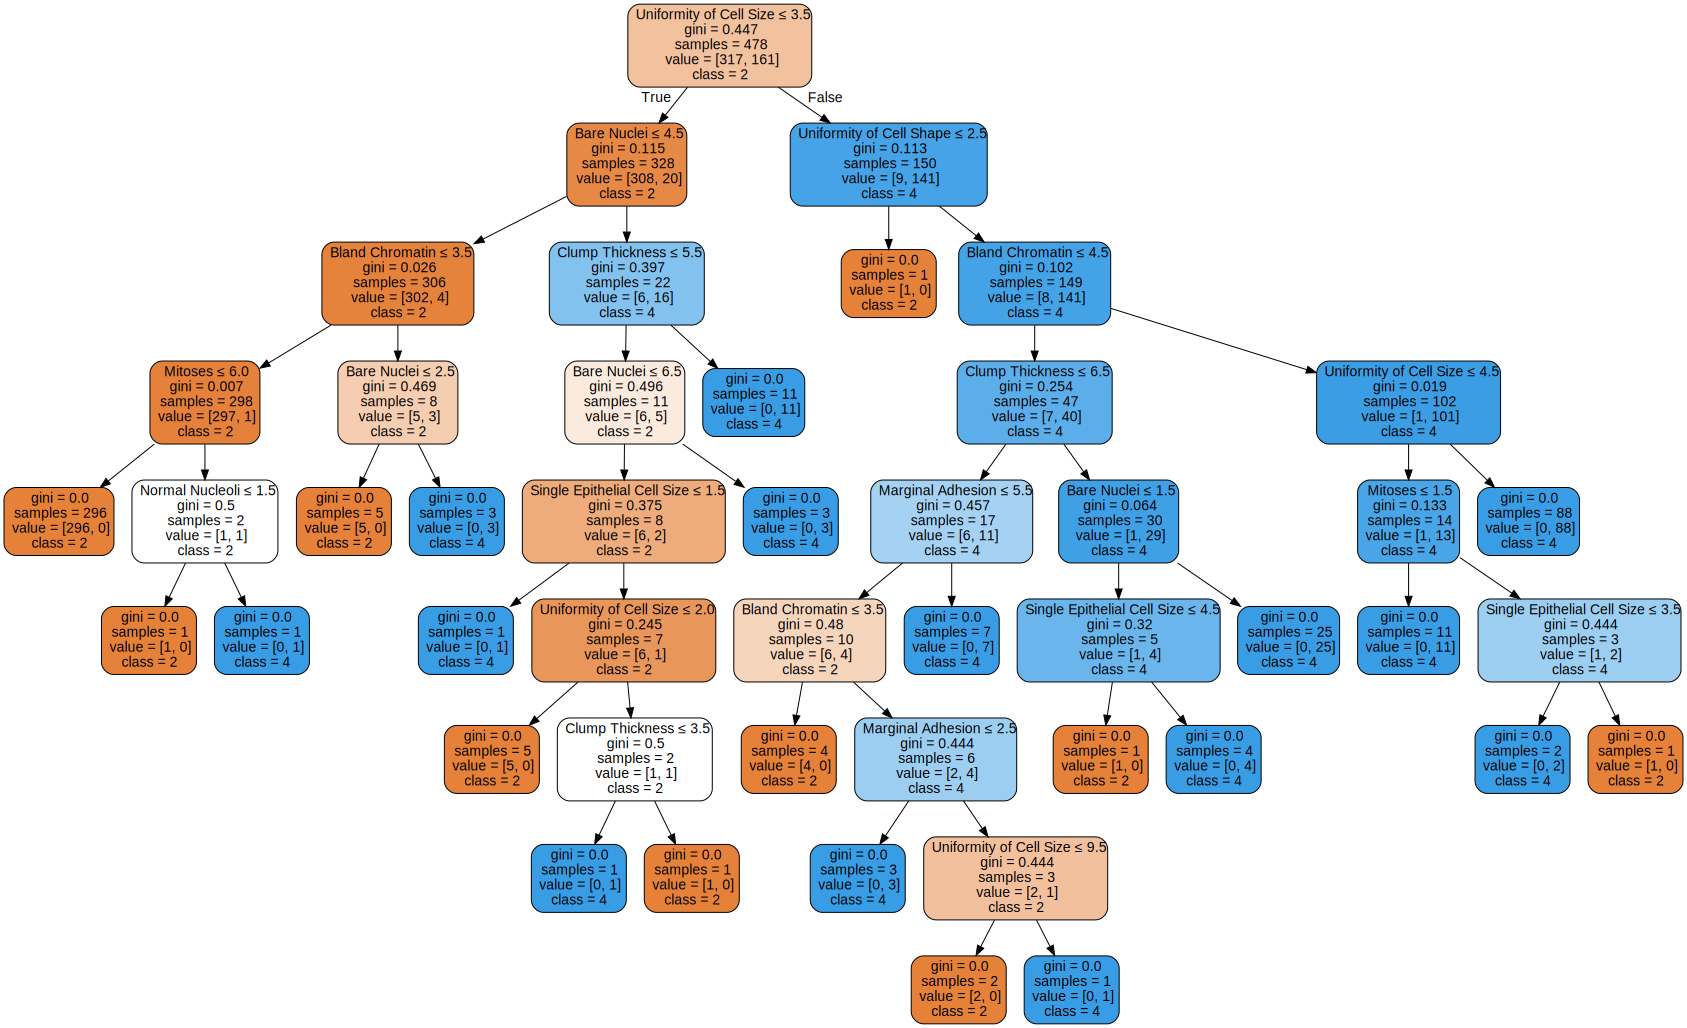

In [6]:
"""
Provided a breast cancer dataset, this program applies a decision tree to determine the accuracy of the training model.
The dataset is first cleaned to remove rows containing empty values.
The features and target variable are identified.
Data is split between training and testing to determine accuracy.

Author: Rohan Kulkarni
Date: October 10, 2024
Version: 1.0.0
"""


# import Scikit-learn libraries for Decision Tree features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import pretty printing to print to output
from pprint import pprint

# import visualizing libraries
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# import libraries for data manipulation
import pandas as pd
import numpy as np

# read breast cancer dataset from the provided source
data = pd.read_csv('https://home.adelphi.edu/~sl22397/0145-335/code/dataset/breast-cancer-wisconsin.data',header=None)

# Clean the data: handle missing values and drop duplicates
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# The dataset has 11 columns
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'class']
data.head()

# The shape of the data matrix (without class attribute)
print("Matrix shape without class: " + repr(data.shape))

# Identified 9 features from the dataset
feature_cols = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses']

# The names of the features
print("The data set has the following features:")
pprint(feature_cols)

# The names of the classes
print("The data set has the following classes:")
pprint(data['class'].unique())

data.nunique(axis=0)

# Split into training and test, 30% for test and 70% for training
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data['class'], shuffle=True, test_size=0.3, random_state=42)

# DECISION TREE
# initialize the model with standard parameters. Use gini index as the criteria in decision tree
clf_dt = DecisionTreeClassifier(criterion="gini")
# train the model
clf_dt.fit(X_train,y_train)

# Evaluating on the test data
y_test_pred = clf_dt.predict(X_test);
a_dt_test = accuracy_score(y_test, y_test_pred);

# Evaluating on the training data
y_train_pred = clf_dt.predict(X_train);
a_dt_train = accuracy_score(y_train, y_train_pred);

print("Training data accuracy is " +  repr(a_dt_train) + " and test data accuracy is " + repr(a_dt_test))

# Print the decision tree
import graphviz

dot_data = export_graphviz(clf_dt, out_file=None,
                      feature_names=feature_cols,
                      class_names=np.array(data['class'].unique()).astype('str').tolist(),
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph